## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  73.515963   648.054304  0.865565   2.065223  1.587731
1  35.050539   401.945397  0.900582  10.591454  1.587682
2  49.794518   915.861866  0.504833   6.404511  1.545805
3  91.520140   627.170904  0.850636   9.512118  1.396226
4  21.941908  1707.402929  0.399899   5.485031  1.709355


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0059866	total: 54ms	remaining: 53.9s
1:	learn: 0.9970233	total: 54.6ms	remaining: 27.3s
2:	learn: 0.9910208	total: 55.2ms	remaining: 18.4s
3:	learn: 0.9816037	total: 55.9ms	remaining: 13.9s
4:	learn: 0.9735379	total: 56.5ms	remaining: 11.2s
5:	learn: 0.9666997	total: 57.1ms	remaining: 9.45s
6:	learn: 0.9599498	total: 59.5ms	remaining: 8.44s
7:	learn: 0.9528637	total: 60ms	remaining: 7.44s
8:	learn: 0.9454577	total: 60.5ms	remaining: 6.66s
9:	learn: 0.9360501	total: 61ms	remaining: 6.04s
10:	learn: 0.9269889	total: 61.6ms	remaining: 5.53s
11:	learn: 0.9193262	total: 62.1ms	remaining: 5.11s
12:	learn: 0.9126458	total: 62.6ms	remaining: 4.75s
13:	learn: 0.9065095	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8984758	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8929457	total: 64.9ms	remaining: 3.99s
16:	learn: 0.8861773	total: 65.4ms	remaining: 3.78s
17:	learn: 0.8788108	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8723414	total: 66.7ms	remaining: 3.44s

50:	learn: 0.6891004	total: 83.8ms	remaining: 1.56s
51:	learn: 0.6849710	total: 84.3ms	remaining: 1.54s
52:	learn: 0.6801290	total: 85.2ms	remaining: 1.52s
53:	learn: 0.6753333	total: 85.7ms	remaining: 1.5s
54:	learn: 0.6711846	total: 86.3ms	remaining: 1.48s
55:	learn: 0.6655407	total: 86.9ms	remaining: 1.47s
56:	learn: 0.6605375	total: 87.4ms	remaining: 1.45s
57:	learn: 0.6573261	total: 88ms	remaining: 1.43s
58:	learn: 0.6527438	total: 88.5ms	remaining: 1.41s
59:	learn: 0.6484584	total: 89.1ms	remaining: 1.4s
60:	learn: 0.6443828	total: 89.6ms	remaining: 1.38s
61:	learn: 0.6399632	total: 90ms	remaining: 1.36s
62:	learn: 0.6362453	total: 90.5ms	remaining: 1.34s
63:	learn: 0.6327832	total: 93ms	remaining: 1.36s
64:	learn: 0.6280841	total: 94ms	remaining: 1.35s
65:	learn: 0.6247742	total: 94.7ms	remaining: 1.34s
66:	learn: 0.6206415	total: 95.4ms	remaining: 1.33s
67:	learn: 0.6169076	total: 96ms	remaining: 1.31s
68:	learn: 0.6132797	total: 96.5ms	remaining: 1.3s
69:	learn: 0.6087921	tota

207:	learn: 0.3118635	total: 159ms	remaining: 607ms
208:	learn: 0.3105011	total: 160ms	remaining: 605ms
209:	learn: 0.3094778	total: 161ms	remaining: 604ms
210:	learn: 0.3088441	total: 161ms	remaining: 602ms
211:	learn: 0.3078069	total: 161ms	remaining: 600ms
212:	learn: 0.3057302	total: 162ms	remaining: 597ms
213:	learn: 0.3038342	total: 162ms	remaining: 595ms
214:	learn: 0.3025969	total: 163ms	remaining: 594ms
215:	learn: 0.3010435	total: 163ms	remaining: 593ms
216:	learn: 0.3001102	total: 164ms	remaining: 591ms
217:	learn: 0.2991459	total: 164ms	remaining: 590ms
218:	learn: 0.2983219	total: 165ms	remaining: 588ms
219:	learn: 0.2977247	total: 165ms	remaining: 586ms
220:	learn: 0.2965527	total: 166ms	remaining: 584ms
221:	learn: 0.2953066	total: 166ms	remaining: 582ms
222:	learn: 0.2940562	total: 167ms	remaining: 580ms
223:	learn: 0.2931872	total: 167ms	remaining: 578ms
224:	learn: 0.2922375	total: 167ms	remaining: 577ms
225:	learn: 0.2908639	total: 168ms	remaining: 575ms
226:	learn: 

382:	learn: 0.1798198	total: 232ms	remaining: 374ms
383:	learn: 0.1795823	total: 233ms	remaining: 373ms
384:	learn: 0.1794643	total: 233ms	remaining: 372ms
385:	learn: 0.1789658	total: 233ms	remaining: 371ms
386:	learn: 0.1788495	total: 234ms	remaining: 370ms
387:	learn: 0.1783510	total: 234ms	remaining: 370ms
388:	learn: 0.1781207	total: 235ms	remaining: 369ms
389:	learn: 0.1768677	total: 235ms	remaining: 368ms
390:	learn: 0.1766425	total: 236ms	remaining: 367ms
391:	learn: 0.1760086	total: 236ms	remaining: 366ms
392:	learn: 0.1749141	total: 236ms	remaining: 365ms
393:	learn: 0.1743452	total: 237ms	remaining: 364ms
394:	learn: 0.1741276	total: 237ms	remaining: 363ms
395:	learn: 0.1730690	total: 237ms	remaining: 362ms
396:	learn: 0.1726257	total: 238ms	remaining: 361ms
397:	learn: 0.1721588	total: 238ms	remaining: 360ms
398:	learn: 0.1716125	total: 239ms	remaining: 359ms
399:	learn: 0.1714008	total: 239ms	remaining: 359ms
400:	learn: 0.1708095	total: 239ms	remaining: 358ms
401:	learn: 

570:	learn: 0.1071861	total: 312ms	remaining: 234ms
571:	learn: 0.1070423	total: 313ms	remaining: 234ms
572:	learn: 0.1069194	total: 313ms	remaining: 233ms
573:	learn: 0.1064956	total: 313ms	remaining: 233ms
574:	learn: 0.1060364	total: 314ms	remaining: 232ms
575:	learn: 0.1059151	total: 314ms	remaining: 231ms
576:	learn: 0.1057955	total: 315ms	remaining: 231ms
577:	learn: 0.1052048	total: 315ms	remaining: 230ms
578:	learn: 0.1046446	total: 316ms	remaining: 230ms
579:	learn: 0.1044363	total: 316ms	remaining: 229ms
580:	learn: 0.1039963	total: 316ms	remaining: 228ms
581:	learn: 0.1037662	total: 317ms	remaining: 228ms
582:	learn: 0.1035816	total: 317ms	remaining: 227ms
583:	learn: 0.1031532	total: 318ms	remaining: 226ms
584:	learn: 0.1029724	total: 318ms	remaining: 226ms
585:	learn: 0.1027956	total: 318ms	remaining: 225ms
586:	learn: 0.1024055	total: 319ms	remaining: 224ms
587:	learn: 0.1018460	total: 319ms	remaining: 224ms
588:	learn: 0.1014666	total: 320ms	remaining: 223ms
589:	learn: 

771:	learn: 0.0598847	total: 395ms	remaining: 117ms
772:	learn: 0.0597623	total: 395ms	remaining: 116ms
773:	learn: 0.0596896	total: 396ms	remaining: 116ms
774:	learn: 0.0595526	total: 396ms	remaining: 115ms
775:	learn: 0.0594151	total: 397ms	remaining: 115ms
776:	learn: 0.0592343	total: 397ms	remaining: 114ms
777:	learn: 0.0588891	total: 398ms	remaining: 113ms
778:	learn: 0.0587551	total: 398ms	remaining: 113ms
779:	learn: 0.0585106	total: 398ms	remaining: 112ms
780:	learn: 0.0581683	total: 399ms	remaining: 112ms
781:	learn: 0.0579941	total: 399ms	remaining: 111ms
782:	learn: 0.0576595	total: 400ms	remaining: 111ms
783:	learn: 0.0574900	total: 400ms	remaining: 110ms
784:	learn: 0.0574233	total: 401ms	remaining: 110ms
785:	learn: 0.0573575	total: 401ms	remaining: 109ms
786:	learn: 0.0571085	total: 401ms	remaining: 109ms
787:	learn: 0.0570437	total: 402ms	remaining: 108ms
788:	learn: 0.0569273	total: 402ms	remaining: 108ms
789:	learn: 0.0568641	total: 403ms	remaining: 107ms
790:	learn: 

958:	learn: 0.0343977	total: 473ms	remaining: 20.2ms
959:	learn: 0.0343536	total: 475ms	remaining: 19.8ms
960:	learn: 0.0341784	total: 476ms	remaining: 19.3ms
961:	learn: 0.0340886	total: 476ms	remaining: 18.8ms
962:	learn: 0.0340449	total: 477ms	remaining: 18.3ms
963:	learn: 0.0340019	total: 477ms	remaining: 17.8ms
964:	learn: 0.0339594	total: 477ms	remaining: 17.3ms
965:	learn: 0.0337755	total: 478ms	remaining: 16.8ms
966:	learn: 0.0335969	total: 478ms	remaining: 16.3ms
967:	learn: 0.0334285	total: 479ms	remaining: 15.8ms
968:	learn: 0.0333870	total: 479ms	remaining: 15.3ms
969:	learn: 0.0333004	total: 479ms	remaining: 14.8ms
970:	learn: 0.0332594	total: 480ms	remaining: 14.3ms
971:	learn: 0.0330874	total: 480ms	remaining: 13.8ms
972:	learn: 0.0330470	total: 481ms	remaining: 13.3ms
973:	learn: 0.0329182	total: 481ms	remaining: 12.8ms
974:	learn: 0.0328342	total: 481ms	remaining: 12.3ms
975:	learn: 0.0327942	total: 482ms	remaining: 11.9ms
976:	learn: 0.0327548	total: 482ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5464953031506997


ABC Pre-generator MAE 1.0471245222673744


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

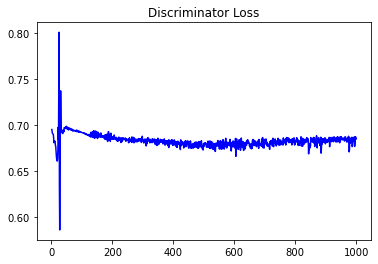

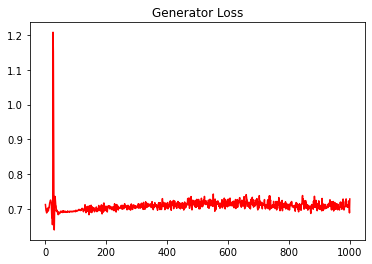

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6270871835909784


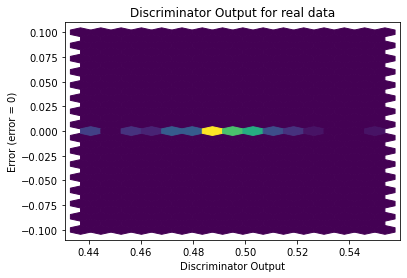

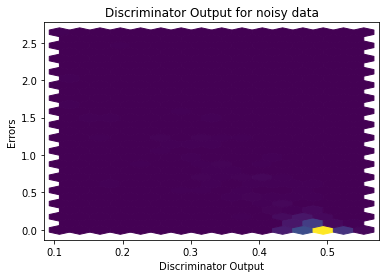

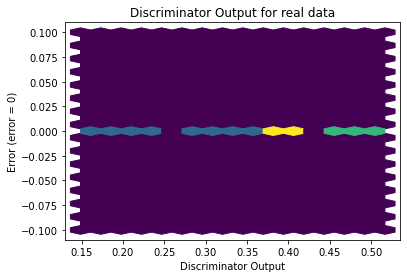

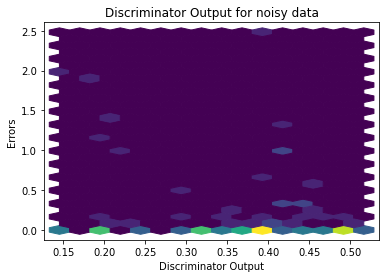

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

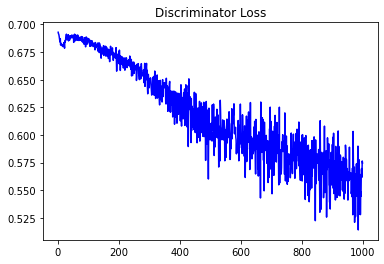

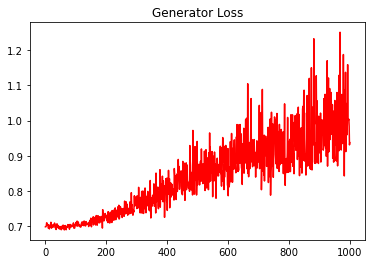

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5334317638203502


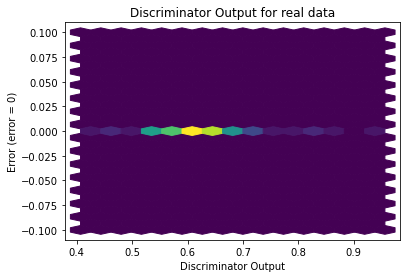

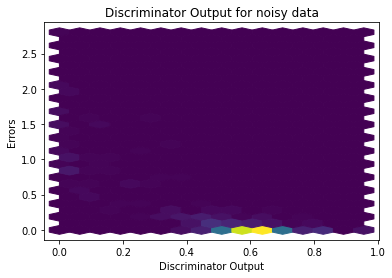

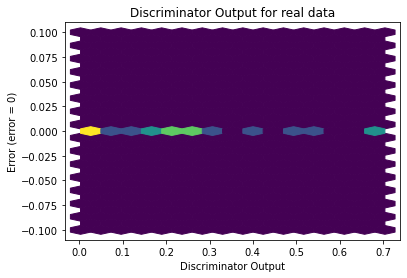

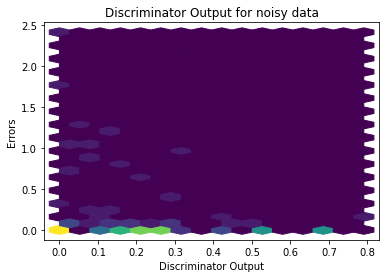

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


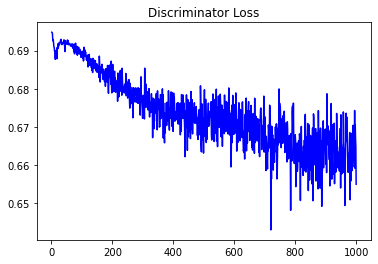

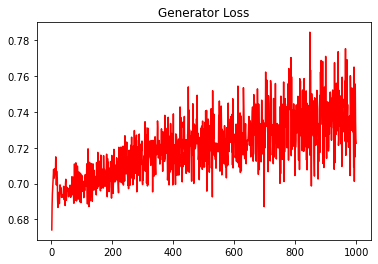

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.6590558211524039


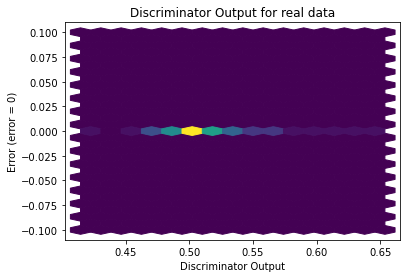

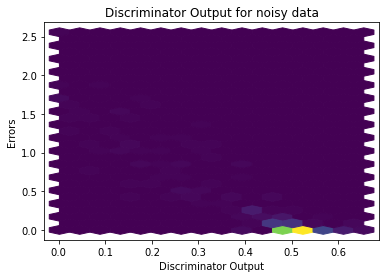

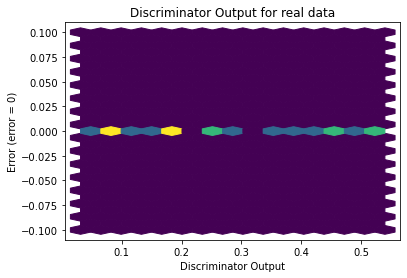

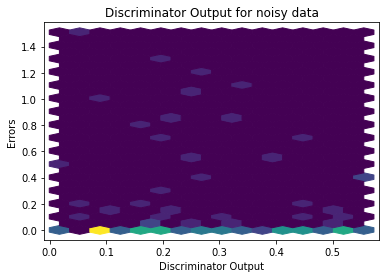

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


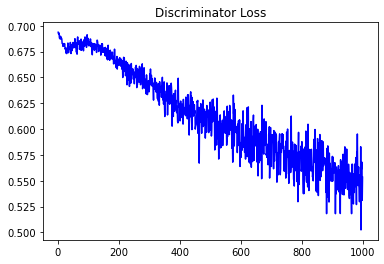

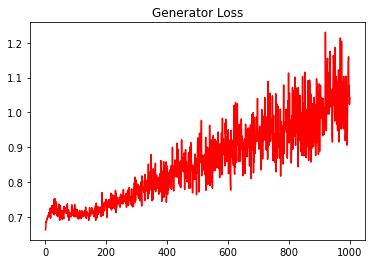

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.6260006871675141


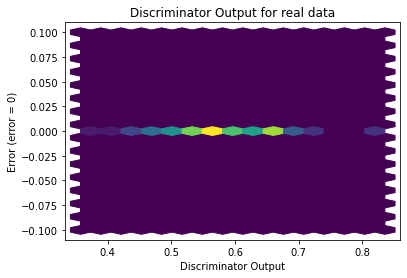

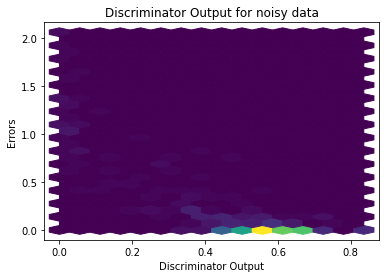

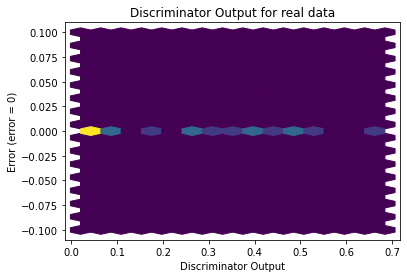

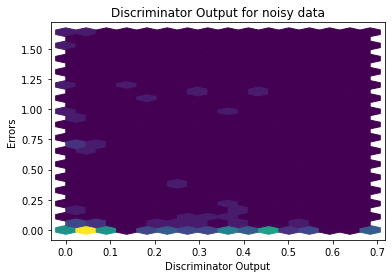

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1733]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6596]], requires_grad=True)
